<a href="https://colab.research.google.com/github/sevvalbilgi/RPS-Game/blob/main/RPS_Game.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Installing necessary libraries
!pip install pycocotools
!pip install ffmpeg

  Preparing metadata (setup.py) ... done
  Created wheel for ffmpeg: filename=ffmpeg-1.4-py3-none-any.whl size=6082 sha256=a470d0508f686db40692417616ffc19cb3ff90c25b27b834de10c883000c7beb
  Stored in directory: /root/.cache/pip/wheels/8e/7a/69/cd6aeb83b126a7f04cbe7c9d929028dc52a6e7d525ff56003a
Successfully built ffmpeg


In [2]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Changing to the working directory
import os
work_dir= "/content/drive/MyDrive/SKILLIT Courses/AI Level 2/Final Project"
os.chdir(work_dir)

Mounted at /content/drive


In [15]:
# Importing necessary modules
from colab_utils import imshow, videoGrabber
import numpy as np
import matplotlib.pyplot as plt
from google.colab import output

# Setting TensorFlow version to 2.x
%tensorflow_version 2.X
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tqdm.auto import tqdm
import time
import random

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [5]:
# Defining class names
CLASS_NAME= ['Paper', 'Rock', 'Scissor']

In [6]:
# Function to capture images
def capture_images (numImage=100,label='Null'):

  vid=videoGrabber(showVideo=True, size= (224,224))
  img=[]
  y=[]

   # Capturing the specified number of images

  for x in tqdm(range(numImage)):
    new_image = np.array(vid(0))
    img.append(new_image)
    if label!='Null':
      y.append(label)
  img = np.array(img)
  y = np.array(y)
  return img,y

In [7]:
# Capturing images and labels for paper
paper_images, paper_label= capture_images(numImage=100, label=0)

  0%|          | 0/100 [00:00<?, ?it/s]

In [8]:
# Capturing images and labels for rock
rock_images, rock_label= capture_images(numImage=100,label=1)

  0%|          | 0/100 [00:00<?, ?it/s]

In [9]:
# Capturing images and labels for scissor
scissor_images, scissor_label= capture_images(numImage= 100,label=2)

  0%|          | 0/100 [00:00<?, ?it/s]

In [10]:
# Combining training images and labels
train_images = np.concatenate((paper_images, rock_images, scissor_images))
train_images= train_images/255
train_labels= np.concatenate((paper_label, rock_label, scissor_label))

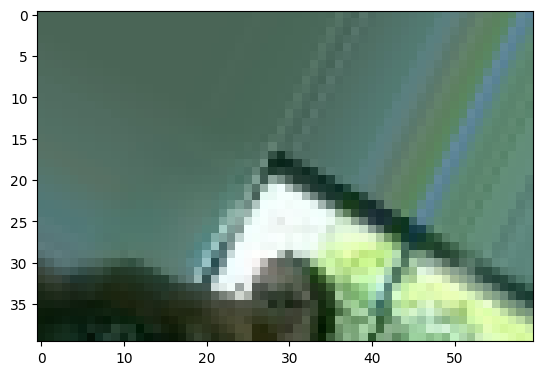

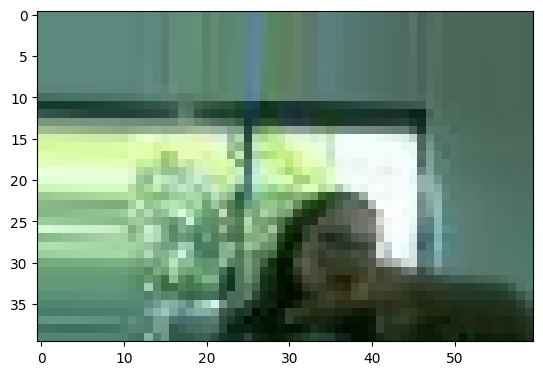

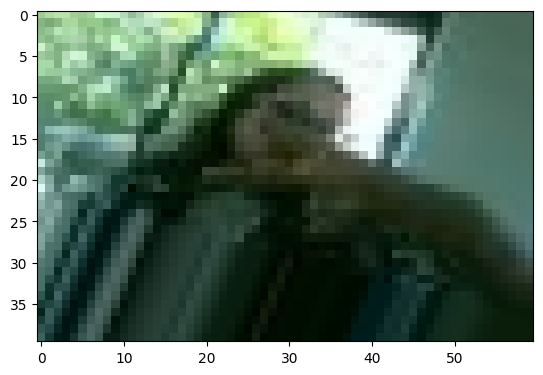

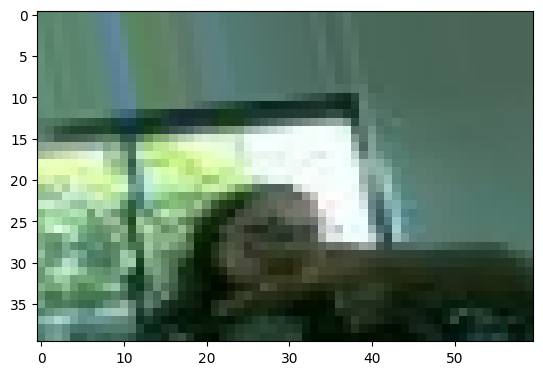

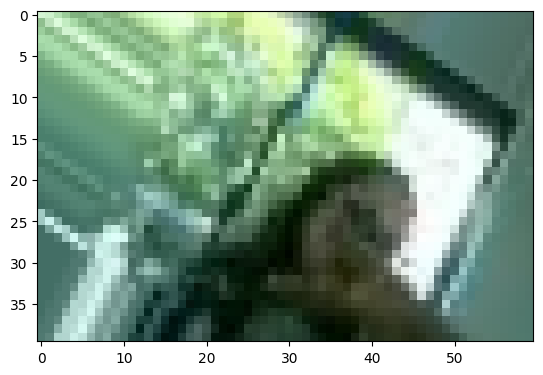

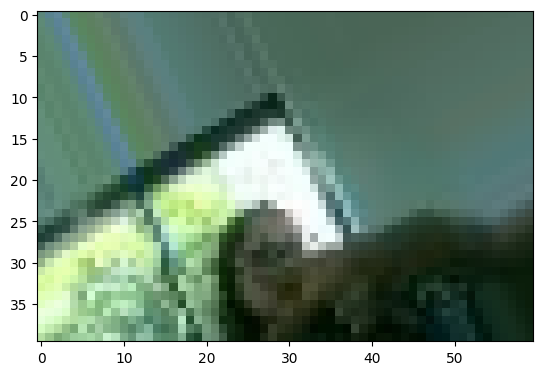

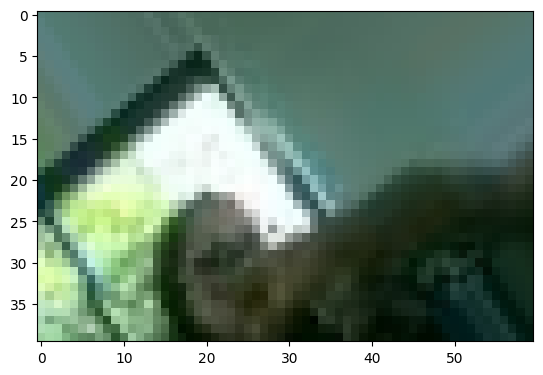

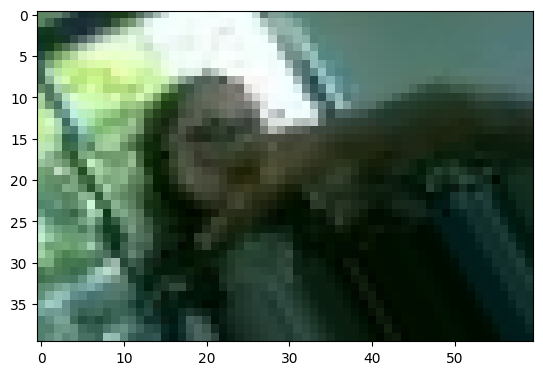

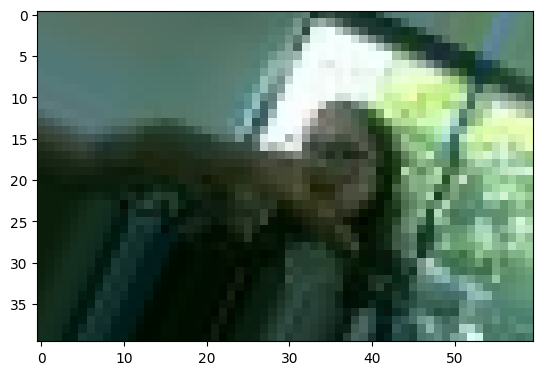

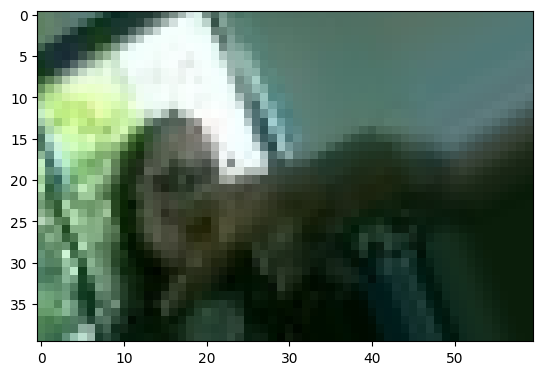

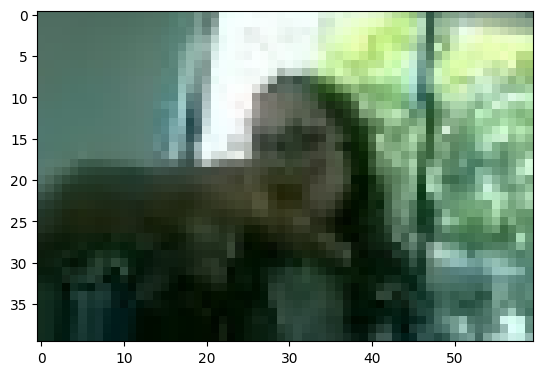

In [11]:
# Image data augmentation settings
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

datagen= ImageDataGenerator(
rotation_range= 40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip= True,
fill_mode='nearest')

# Creating new training images and labels
idx = 0
new_train_images = []
new_train_labels= []
for image in train_images:
  img= image.reshape((1,)+image.shape)
  i=0
  for batch in datagen.flow(img, save_prefix='test', save_format='jpeg'):
      plt.figure(i)
      plot= plt.imshow(batch[0])
      i+=1
      new_train_images.append(batch[0])
      new_train_labels.append(train_labels[idx])
      if i> 10:
        break
  idx+=1
new_train_images = np.array(new_train_images)
new_train_labels = np.array(new_train_labels)


In [12]:
# Building the model
model = models.Sequential()
model.add(layers.Conv2D(32,(5,5),activation='relu',input_shape=(40,60,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(5,5),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(5,5),activation='relu'))
model.summary()


# Adding dense layers
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(3))
model.summary()


# Compiling the model
model.compile(optimizer= 'adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


# Training the model
history= model.fit(new_train_images, new_train_labels, epochs=10)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 36, 56, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2  (None, 18, 28, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 24, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 12, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 8, 64)          102464    
                                                                 
Total params: 156160 (610.00 KB)
Trainable params: 15616

  0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 181ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


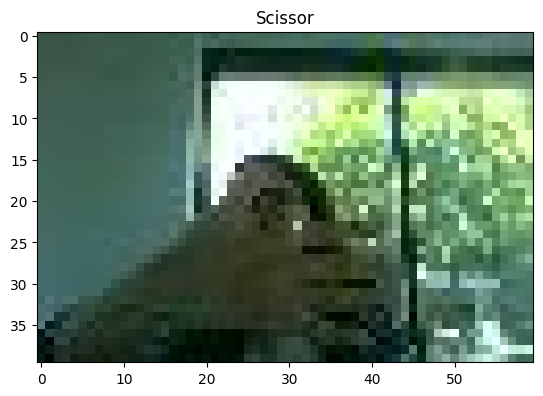

In [13]:
# Capturing a test image and making a prediction
test_image, _= capture_images(1)
test_image= test_image/255
prediction= model.predict(test_image)
plt.imshow(test_image[0])
plt.title(CLASS_NAME[np.argmax(prediction[0])])

# Saving the model
model.save('self-made_model.h5')


In [16]:
# Preparing for the game start
output.clear()
print("****************************************************************")
print("Welcome to Rock Paper Scissor!")
print("****************************************************************")

for i in range(3):

   time.sleep(1)
   output.clear()
   print("**********************************************************************")
   print("Welcome to Rock Paper Scissor!")
   print("****************************************************************")
   print(3-i)

output.clear()
print("ROCK - PAPER- SCISSOR--------- SHOOT!")

# Capturing the user's image and making a prediction
user_image, _ = capture_images(1)
user_image = user_image/255
prediction = model.predict(user_image)
output.clear()
user_selection = CLASS_NAME[np.argmax(prediction[0])]
print(f'You have selected : {user_selection}')

# Making the computer's selection
random_int = random.randint(0,2)
computer_selection = CLASS_NAME[random_int]
print(f'The Computer has selected: {computer_selection} ')

# Determining the result
if user_selection == 'Rock':
  if computer_selection == 'Rock':
    print("We both selected Rock... It's a TIE")
  if computer_selection == 'Paper':
    print("Paper beats Rock! COMPUTER WINS")
  if computer_selection == 'Scissor':
    print("Rock beats Scissor! YOU WIN")

if user_selection == 'Paper':
  if computer_selection == 'Rock':
    print("Paper beats Rock! You WIN")
  if computer_selection == 'Paper':
    print("We both selected Paper... It's a TIE")
  if computer_selection == 'Scissor':
    print("Scissor beats Paper! COMPUTER WINS")

if user_selection == 'Scissor':
  if computer_selection == 'Rock':
    print("Rock beats Scissor! COMPUTER WINS")
  if computer_selection == 'Paper':
    print("Paper beats Scissor! You WIN")
  if computer_selection == 'Scissor':
    print("We both selected Scissor... It's a TIE")



You have selected : Scissor
The Computer has selected: Scissor 
We both selected Scissor... It's a TIE
